In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original = pd.read_csv('./Clinical/heart_failure_clinical_records_dataset.csv')

In [2]:
df = original.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Numero istanze dataset:  299
Sono presenti missing values?  False
Il dataset è bilanciato rispetto a 'DEATH_EVENT'?  False


<AxesSubplot:title={'center':'Count (DEATH_EVENT)'}, xlabel='DEATH_EVENT'>

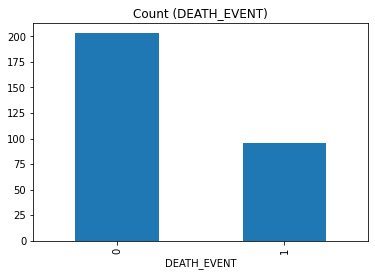

In [3]:
print("Numero istanze dataset: ", len(df))
print("Sono presenti missing values? ", df.isnull().values.any())
#print("Numero di missing values: ", df.isnull().sum().sum())
#print("Numero di missing values per attributo: ", df.isnull().sum())
print("Il dataset è bilanciato rispetto a 'DEATH_EVENT'? ", df['DEATH_EVENT'].value_counts()[0] == df['DEATH_EVENT'].value_counts()[1])
df['DEATH_EVENT'].value_counts().plot(kind='bar', title='Count (DEATH_EVENT)')


<AxesSubplot:title={'center':'Count (age)'}, ylabel='Frequency'>

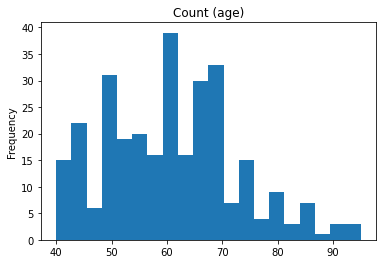

In [4]:
df['age'].plot(kind='hist', title='Count (age)', bins=20)

<AxesSubplot:title={'center':'Count (DEATH_EVENT)'}, xlabel='sex'>

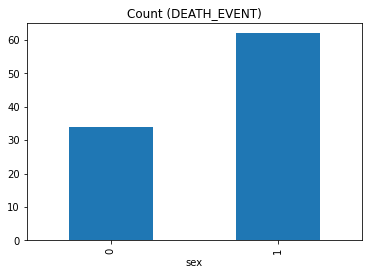

In [5]:
df.loc[df['DEATH_EVENT'] == 1].groupby('sex').count()['age'].plot(kind='bar', title='Count (DEATH_EVENT)')
#sns.countplot(x='sex', hue='DEATH_EVENT', data=df)

In [6]:
age_groups = pd.cut(df['age'], bins=5)
pivot = pd.pivot_table(df, index = age_groups, columns= ['sex', 'smoking'], values = 'DEATH_EVENT')
pivot

sex                    0              1          
smoking                0    1         0         1
age                                              
(39.945, 51.0]  0.258065  1.0  0.346154  0.100000
(51.0, 62.0]    0.333333  1.0  0.218750  0.250000
(62.0, 73.0]    0.250000  0.5  0.260870  0.357143
(73.0, 84.0]    0.750000  NaN  0.571429  0.444444
(84.0, 95.0]    0.500000  NaN  0.714286  1.000000

In [7]:
a = len(df.loc[(df['anaemia'] == 1) & (df['DEATH_EVENT'] == 1)])
b = df[(df['anaemia']==True)].shape[0]
a/b

0.35658914728682173

<AxesSubplot:title={'center':'Count (DEATH_EVENT)'}, xlabel='age'>

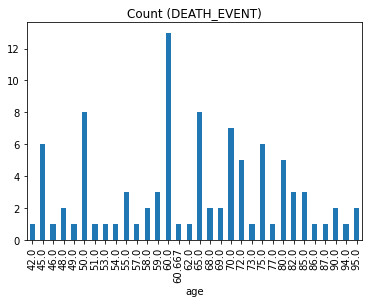

In [8]:
df.loc[df['DEATH_EVENT'] == 1].groupby('age').count()['DEATH_EVENT'].plot(kind='bar', title='Count (DEATH_EVENT)')

# PARTE 2

In [9]:
df = original.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


DecisionTreeClassifier()
Accuracy on train set:  1.0
Accuracy on test set:  0.7666666666666667


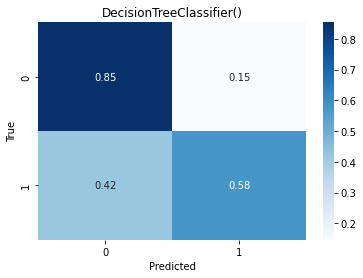

LogisticRegression(solver='liblinear')
Accuracy on train set:  0.8368200836820083
Accuracy on test set:  0.8


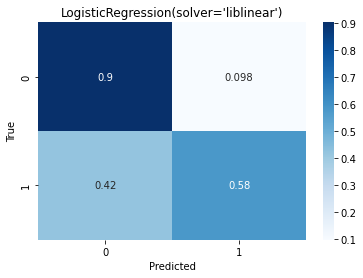

DummyClassifier()
Accuracy on train set:  0.6778242677824268
Accuracy on test set:  0.6833333333333333


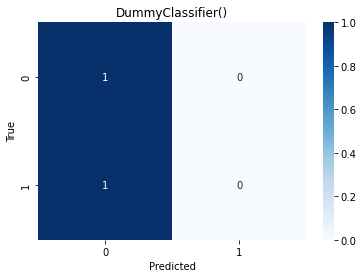

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = [DecisionTreeClassifier(), LogisticRegression(solver='liblinear'), DummyClassifier()]
for m in model:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(m)
    print("Accuracy on train set: ", accuracy_score(y_train, m.predict(X_train)))
    print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, cmap='Blues')
    plt.title(m)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [11]:
from sklearn.model_selection import cross_val_score

for m in model:
    print(m)
    scores = cross_val_score(m, X, y, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



DecisionTreeClassifier()
Accuracy: 0.63 (+/- 0.32)
LogisticRegression(solver='liblinear')
Accuracy: 0.74 (+/- 0.42)
DummyClassifier()
Accuracy: 0.68 (+/- 0.01)


In [12]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression


X = df.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lin = LinearRegression()
lin.fit(X_train, y_train)
#analizza i 5 coefficienti di regressione con valore assoluto maggiore
print("Coefficients with max abs value: ", np.argsort(np.abs(lin.coef_))[-5:])
X = df.iloc[:, np.argsort(np.abs(lin.coef_))[-5:]]
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Coefficients with max abs value:  [2 0 4 7 8]
Accuracy: 0.68 (+/- 0.18)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

X = df.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

all_else = Pipeline([('scaler', MinMaxScaler()), ('normalizer', Normalizer())])
transf = ColumnTransformer([('discretizer', KBinsDiscretizer(n_bins=6, encode='ordinal'), ['platelets','age'])], remainder=all_else)
pipe = Pipeline([('transf', transf), ('clf', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy on train set: ", accuracy_score(y_train, pipe.predict(X_train)))
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))

Accuracy on train set:  1.0
Accuracy on test set:  0.55


In [14]:
from sklearn.model_selection import GridSearchCV

X = df.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
param_grid = {'transf__discretizer__n_bins': [5, 6],
                'clf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'clf__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: ", grid.best_score_)
print("Test set score: ", grid.score(X_test, y_test))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy:  0.7405141843971631
Test set score:  0.7833333333333333
Best parameters:  {'clf__max_depth': 2, 'clf__min_samples_split': 2, 'transf__discretizer__n_bins': 5}


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
X = df.drop(['DEATH_EVENT', 'time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X = df.drop(['DEATH_EVENT', 'time'], axis=1)
feature_transformer = FeatureUnion([('pca', PCA(n_components=2)), ('univ_select', SelectKBest(k=2)), ('original', 'passthrough')])
pipe = Pipeline([('transf', transf),('feature_transformer', feature_transformer), ('clf', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy on train set: ", accuracy_score(y_train, pipe.predict(X_train)))
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))


Accuracy on train set:  1.0
Accuracy on test set:  0.7166666666666667
